# Describing Distributions (Core)
- Kevin Barnett
- 05/12/23

## Tasks
- The features to analyze: 
    - VitD_levels
    - Doc_visits
    - TotalCharge
- [x] Plot a histogram with a kde (kernel density estimate)
    - [x] Add a line for the mean (red)
    - [x] Add a line for the median (green)
    - [x] Add a line for for +1 std from the mean (black)
    - [x] Add a line for the - 1 std from the mean (black)
    Highlight the range between +1 and =1 std (yellow)
- Answer the following questions:
    - [ ] Is it Discrete or Continuous?
    - [ ] Does it have a skew? If so, which direction (+/-)
    - [ ] What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)

In [1]:
# Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Load data
df = pd.read_csv("C:\\Users\\hamma\\Documents\\DataEnrichment\\Describing-Distributions-Core-Assignment\\data (8).csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               995 non-null    object 
 1   Lat                 1000 non-null   float64
 2   Lng                 1000 non-null   float64
 3   Area                995 non-null    object 
 4   Children            993 non-null    float64
 5   Age                 1000 non-null   int64  
 6   Income              1000 non-null   float64
 7   Marital             995 non-null    object 
 8   Gender              995 non-null    object 
 9   ReAdmis             1000 non-null   int64  
 10  VitD_levels         1000 non-null   float64
 11  Doc_visits          1000 non-null   int64  
 12  Full_meals_eaten    1000 non-null   int64  
 13  vitD_supp           1000 non-null   int64  
 14  Soft_drink          1000 non-null   int64  
 15  Initial_admin       995 non-null    object 
 16  HighBlo

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


In [3]:
# Filter columns to iterate over
df_filtered = df[['VitD_levels','Doc_visits','TotalCharge']]
df_filtered.head()

,VitD_levels,Doc_visits,TotalCharge
0,19.141466,6,3726.702860
1,18.940352,4,4193.190458
2,18.057507,4,2434.234222
3,16.576858,4,2127.830423
4,17.439069,5,2113.073274


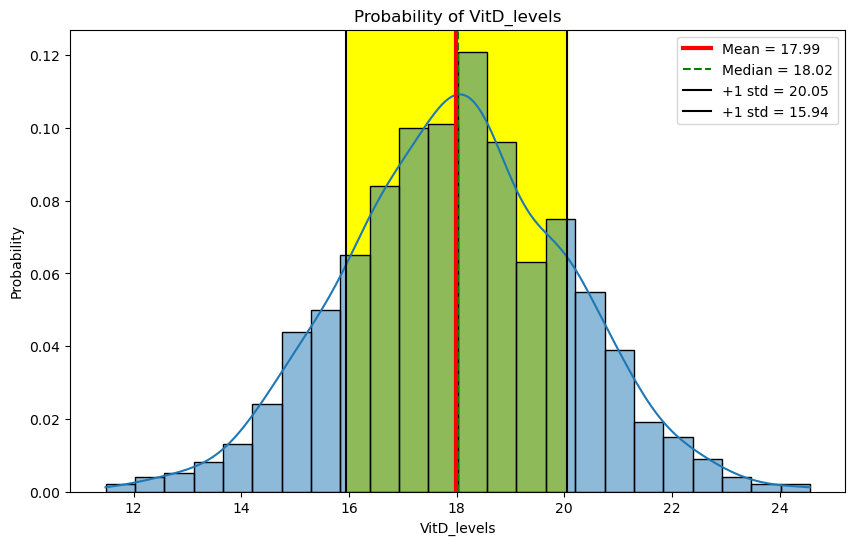

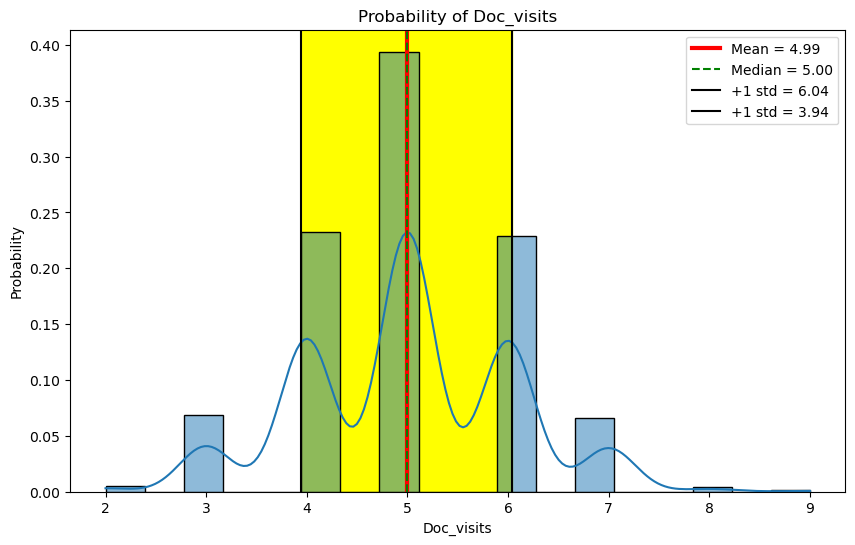

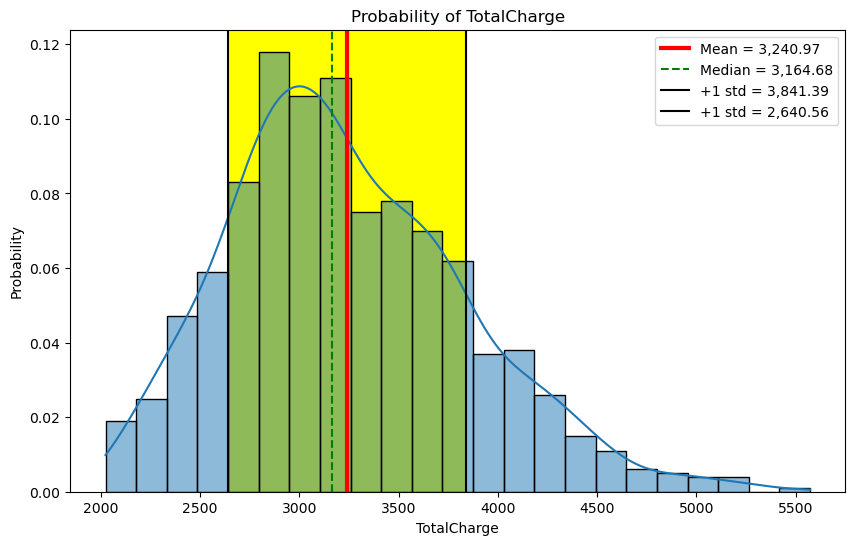

In [5]:
# Iterate over columns in df_filtered to create histplots
for col in df_filtered:
    # Find mean
    mean = df_filtered[col].mean()
    # Find median
    median = df_filtered[col].median()
    # Find standard deviation
    std = df_filtered[col].std()
    plus_one_std = mean + std
    minus_one_std = mean - std
    
    fig,ax = plt.subplots(nrows=1, ncols=1, figsize = (10,6))
    sns.histplot(data=df_filtered[col], stat='probability', kde=True)
    ax.axvline(mean, c='red', linewidth=3.0, label=f'Mean = {mean:,.2f}')
    ax.axvline(median, c='green', linestyle='--', label=f'Median = {median:,.2f}')
    ax.set_title(f'Probability of {col}')
    ax.axvline(plus_one_std, c='k', label=f'+1 std = {plus_one_std:,.2f}')
    ax.axvline(minus_one_std, c='k', label=f'+1 std = {minus_one_std:,.2f}')
    ax.axvspan(plus_one_std, minus_one_std, color='yellow', zorder=0)
    ax.legend();           

## Questions

1. Is it Discrete or Continuous?
    - VitD_levels: Continuous
    - Doc_visits: Discrete
    - TotalCharge: continuous

2. Does it have a skew? If so, which direction (+/-)
    - VitD_levels: Slight negative skew
    - Doc_visits: Slightly negative to no skew
    - TotalCharge: Positive skew

3. What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)
    - VitD_levels: Leptokurtic
    - Doc_visits: Leptokurtic
    - TotalCharge: Leptokurtic